In [58]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

In [59]:
# Debugging
DEBUG = False

## Question 1

In [60]:
# Load data
def load_csv(file_path):
    try:
        data = np.loadtxt(file_path, delimiter=',')
    except ValueError as e:
        try:
            data = np.loadtxt(file_path)
        except:
            with open(file_path, 'r') as file:
                data = np.array([line.strip().split(',') for line in file], dtype=float)
    return data

In [61]:
Xtrain_path = os.path.join(os.getcwd(), 'A1', 'Xtrain.csv')
Ytrain_path = os.path.join(os.getcwd(), 'A1', 'Ytrain.csv')
Xtest_path = os.path.join(os.getcwd(), 'A1', 'Xtest.csv')

X_train = load_csv(Xtrain_path)
Y_train = load_csv(Ytrain_path)
X_test = load_csv(Xtest_path)

### i. Dataset Overview
#### a. How many examples are in the training set? And in the test set?

In [62]:
training_examples = X_train.shape[0]
test_examples = X_test.shape[0]

print(f"Training examples: {training_examples}")
print(f"Test examples: {test_examples}")

Training examples: 3000
Test examples: 3000


#### b. Within the training data, count the positive and negative examples. What's the distribution like? Does this distribution signify any potential issues in terms of design of the machine learning solution and its evaluation?

In [63]:
positive_examples = np.sum(Y_train == 1)
negative_examples = np.sum(Y_train == -1)

print(f"Positive examples: {positive_examples}")
print(f"Negative examples: {negative_examples}")

Positive examples: 311
Negative examples: 2689


**Observations:**

- This distribution shows that dataset is `skewed` towards the `negative examples`, which make up a large majority of the training data.
- This can lead to bias towards predicting the negative class and less generalization towards new data due to this imbalance.

### ii. Visual Data Exploration
#### a. Pick 10 random objects from each class in the training data and display them using plt.matshow. Reshape the flattened 28x28 arrays for this. What patterns or characteristics do you notice?

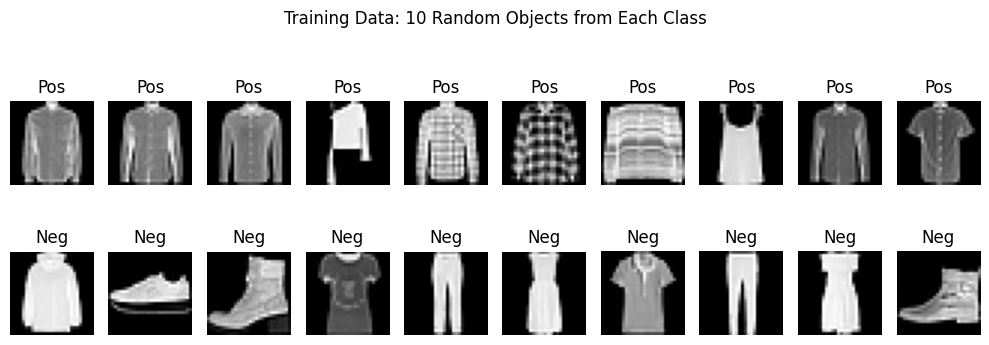

In [65]:
import matplotlib.pyplot as plt

def display_images(data, labels, title):
    pos_indices = np.where(labels == 1)[0]
    neg_indices = np.where(labels == -1)[0]
    
    selected_pos = np.random.choice(pos_indices, 10, replace=False)
    selected_neg = np.random.choice(neg_indices, 10, replace=False)
    
    fig, axes = plt.subplots(2, 10, figsize=(10, 4))
    fig.suptitle(title)
    
    for i, ax in enumerate(axes.flat):
        if i < 10:
            ax.imshow(data[selected_pos[i]].reshape(28, 28), cmap='gray')
            ax.set_title("Pos")
        else:
            ax.imshow(data[selected_neg[i-10]].reshape(28, 28), cmap='gray')
            ax.set_title("Neg")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display images for training data
display_images(X_train, Y_train, "Training Data: 10 Random Objects from Each Class")


**Characteristics**

- The Positive class consists of various top clothing items, such as shirts and jackets.
- They have higher consistency in terms of object types.
- The positive class will be easier for the classifier to learn due to its consistency of items.

- The Negative class consists variety of objects such as shoes, clothing and other non-apparel items.
- They have higher degree of variability, which might make the classification task challenging for a classifier as it needs to learn the set of features for this class.

#### b. Do the same for 10 random objects from the test set. Are there any peculiarities in the data that might challenge your classifier's ability to generalise?

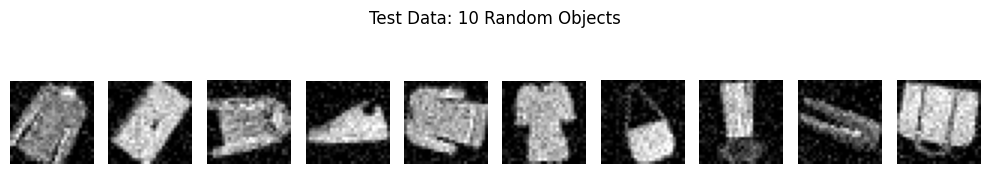

In [8]:
def display_test_images(data, title):
    fig, axes = plt.subplots(1, 10, figsize=(10, 2))
    fig.suptitle(title)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


# Display images for test data
display_test_images(X_test, "Test Data: 10 Random Objects")

**Challenges**

- The images are blurry, have low resolution and have grainy structure. It might be difficult for the classifier to extract and learn the relevant features.
- The test images are not consistent with the training images in terms of quality, resolution, or presentation, the classifier might not perform well.

### iii. Choosing the Right Metric

#### Which performance metric would be best for this task (accuracy, AUC-ROC, AUC-PR, F1, Matthews correlation coefficient, mean squared error etc.)? Share your reasoning for this choice.


### Answer:
- Given the imbalance in the dataset (which is highly skewed towards the negative class), the best metrics for this task will be `AUC-PR` and `Matthews Correlation Coefficient (MCC)`.

- **AUC-PR** - `AUC-PR` is a good metric because it can detect the minority class and focuses on the performance of such minority class. This is perfect in such imbalanced settings. It will plot the precision against recall, whichh will reflect the model's ability to detect the minority class despite having such heavily skewed data with negative class.
- **Mathews Correlation Coefficient (MCC)** - `MCC` is another best match for metric to evaluate the performance of the classifier given that it can evaluate in such imbalanced settings. As it takes into account the true and false positive and negatives (All components of confusion matrix).

#### iv. Benchmarking a Random Classifier
#### Imagine a classifier that randomly guesses labels. What accuracy would you expect it to achieve on both the training and test datasets? Show this through a calculation, statistical proof, or a coding experiment.

Let `P(positive)` be the probability of a data point being positive and `P(negative)` be the probability of it being negative, and assuming a classifier guesses 'positive' and 'negative', the expected accuracy of this classifier can be expressed as:

**Classification Accuracy** = `P(positive) * P(guessing positive) + P(negative) * P(guessing negative)`

Given an imbalanced dataset with **10% positive** and **90% negative** examples:

$$P(positive) = 0.1$$
$$P(negative) = 0.9$$

and because there are only two classes, probability of guessing any one of the class is **50%**.

$$P(guessing positive) = 0.5$$
$$P(guessing negative) = 0.5$$

$$Acc = 0.1 * 0.5 + 0.9 * 0.5$$
$$Acc = 0.05 + 0.45$$
$$Acc = 0.5$$

Even though the dataset is imbalanced, the expected accuracy of a random classifier remains `0.5`. 



#### v. Understanding AUC Metrics for Random Classifier
#### What would be the AUC-ROC and AUC-PR for a random classifier in this context? Again, support your answer with a mathematical or statistical argument, or a practical demonstration.

- AUC-ROC will be `0.5` for a random classifier. 
- This is because the ROC curve plots the TPR against the FPR at various threshold settings. 
- A random classifier will guess positive examples and negative examples with the same rate i.e with `0.5 probability`, which means the TPR and FPR will increase at the same rate as the decision threshold is varied.

## Question No. 2: Nearest Neighbour Classifier


### 2.i. 

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, balanced_accuracy_score, roc_auc_score, average_precision_score, f1_score, matthews_corrcoef

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics = {
    "Fold": [],
    "accuracy": [],
    "balanced_accuracy": [],
    "AUC-ROC": [],
    "AUC-PR": [],
    "F1": [],
    "MCC": []
}

for i, (train_index, test_index) in enumerate(skf.split(X_train, Y_train)):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = Y_train[train_index], Y_train[test_index]
    
    # Initialize and train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_fold, y_train_fold)

    # Predict
    y_pred = knn.predict(X_test_fold)
    y_pred_proba = knn.predict_proba(X_test_fold)[:, 1]

    # Calculate accuracy metrics
    accuracy = np.mean(y_pred == y_test_fold)
    balanced_accuracy = balanced_accuracy_score(y_test_fold, y_pred)

    # Calculate AUC-ROC
    auc_roc = roc_auc_score(y_test_fold, y_pred_proba)

    # Calculate AUC-PR
    auc_pr = average_precision_score(y_test_fold, y_pred_proba)

    # Calculate F1 and MCC
    f1 = f1_score(y_test_fold, y_pred)
    mcc = matthews_corrcoef(y_test_fold, y_pred)

    metrics["Fold"].append(i + 1)
    metrics["accuracy"].append(accuracy)
    metrics["balanced_accuracy"].append(balanced_accuracy)
    metrics["AUC-ROC"].append(auc_roc)
    metrics["AUC-PR"].append(auc_pr)
    metrics["F1"].append(f1)
    metrics["MCC"].append(mcc)

    print(f"Fold {i+1} : Accuracy: {accuracy:.4f}")

results = pd.DataFrame(metrics, index=metrics["Fold"])
summary_statistics = results.describe().loc[['mean', 'std']].T[1:]

print("\nResults : ")
print(results)
print("\n")

print("Summary Statistics : ")
print(summary_statistics)

Fold 1 : Accuracy: 0.9117
Fold 2 : Accuracy: 0.9083
Fold 3 : Accuracy: 0.8983
Fold 4 : Accuracy: 0.9233
Fold 5 : Accuracy: 0.9067

Results : 
   Fold  accuracy  balanced_accuracy   AUC-ROC    AUC-PR        F1       MCC
1     1  0.911667           0.736689  0.859396  0.540386  0.547009  0.499362
2     2  0.908333           0.727695  0.863113  0.512952  0.529915  0.480387
3     3  0.898333           0.665038  0.851181  0.479917  0.429907  0.381459
4     4  0.923333           0.736059  0.888296  0.595787  0.574074  0.540138
5     5  0.906667           0.681653  0.822234  0.429255  0.471698  0.431785


Summary Statistics : 
                       mean       std
accuracy           0.909667  0.009083
balanced_accuracy  0.709427  0.033645
AUC-ROC            0.856844  0.023796
AUC-PR             0.511659  0.062655
F1                 0.510520  0.058635
MCC                0.466626  0.061507


### ii. Plotting of the ROC and PR curves for one fold.

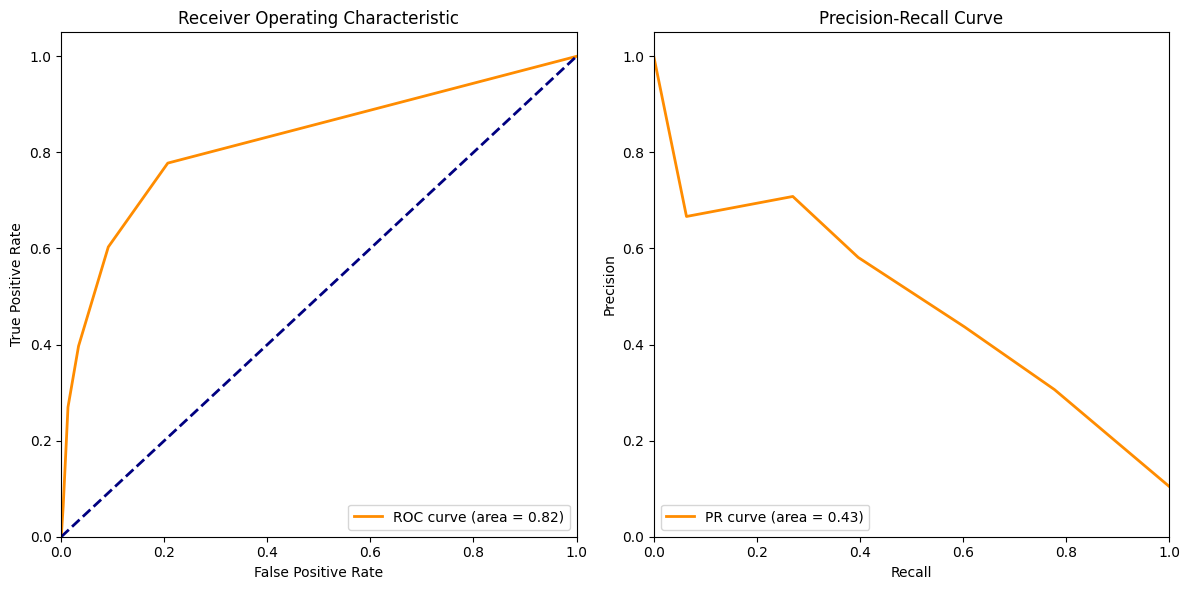

In [68]:
# Plot ROC and PR curves
from sklearn.metrics import auc

y_pred_proba = knn.predict_proba(X_test_fold)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_proba)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(y_test_fold, y_pred_proba)
pr_auc = average_precision_score(y_test_fold, y_pred_proba)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

**Observations**

1. The classifier demonstrates good performance with an AUC-ROC of 0.82, which shows a good ability to distinguish between the positive and negative classes.

2. The AUC-PR of 0.43 suggests that there is a significant trade-off with precision commonly seen with imbalanced datasets.

3. The left-hand side of the ROC curve is the most important part as it represents the classifier's ability to correctly identify positive cases with minimal false positives.

### iii. Impact of Pre-processing

1. Run with only Standard Scaler

In [74]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics = {
    "Fold": [],
    "accuracy": [],
    "balanced_accuracy": [],
    "AUC-ROC": [],
    "AUC-PR": [],
    "F1": [],
    "MCC": []
}

print("Standardized Data")

for i, (train_index, test_index) in enumerate(skf.split(X_train, Y_train)):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = Y_train[train_index], Y_train[test_index]

    X_train_fold = std_scaler.fit_transform(X_train_fold)
    X_test_fold = std_scaler.transform(X_test_fold)
    
    # Initialize and train kNN classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_fold, y_train_fold)

    # Predict
    y_pred = knn.predict(X_test_fold)
    y_pred_proba = knn.predict_proba(X_test_fold)[:, 1]

    # Calculate accuracy metrics
    accuracy = np.mean(y_pred == y_test_fold)
    balanced_accuracy = balanced_accuracy_score(y_test_fold, y_pred)

    # Calculate AUC-ROC
    auc_roc = roc_auc_score(y_test_fold, y_pred_proba)

    # Calculate AUC-PR
    auc_pr = average_precision_score(y_test_fold, y_pred_proba)

    # Calculate F1 and MCC
    f1 = f1_score(y_test_fold, y_pred)
    mcc = matthews_corrcoef(y_test_fold, y_pred)

    metrics["Fold"].append(i + 1)
    metrics["accuracy"].append(accuracy)
    metrics["balanced_accuracy"].append(balanced_accuracy)
    metrics["AUC-ROC"].append(auc_roc)
    metrics["AUC-PR"].append(auc_pr)
    metrics["F1"].append(f1)
    metrics["MCC"].append(mcc)

    print(f"Fold {i+1} : Accuracy: {accuracy:.4f}")

results = pd.DataFrame(metrics, index=metrics["Fold"])
summary_statistics = results.describe().loc[['mean', 'std']].T[1:]

print("\nResults : ")
print(results)
print("\n")

print("Summary Statistics : ")
print(summary_statistics)

Standardized Data
Fold 1 : Accuracy: 0.9083
Fold 2 : Accuracy: 0.9200
Fold 3 : Accuracy: 0.8967
Fold 4 : Accuracy: 0.9167
Fold 5 : Accuracy: 0.9050

Results : 
   Fold  accuracy  balanced_accuracy   AUC-ROC    AUC-PR        F1       MCC
1     1  0.908333           0.734830  0.867700  0.491219  0.537815  0.487566
2     2  0.920000           0.727066  0.878673  0.522806  0.555556  0.519559
3     3  0.896667           0.706919  0.848063  0.474607  0.483333  0.426289
4     4  0.916667           0.703801  0.899179  0.568860  0.519231  0.486276
5     5  0.905000           0.687727  0.846369  0.435114  0.477064  0.432594


Summary Statistics : 
                       mean       std
accuracy           0.909333  0.009324
balanced_accuracy  0.712069  0.018910
AUC-ROC            0.867997  0.022088
AUC-PR             0.498521  0.050455
F1                 0.514600  0.034001
MCC                0.470457  0.039807


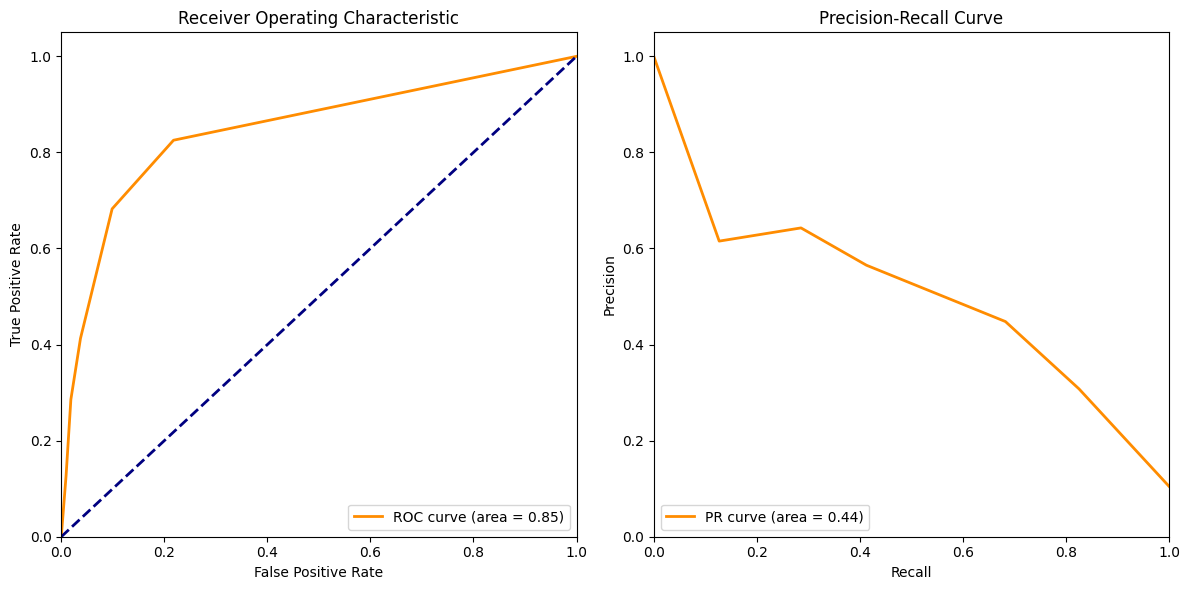

In [72]:
y_pred_proba = knn.predict_proba(X_test_fold)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_fold, y_pred_proba)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(y_test_fold, y_pred_proba)
pr_auc = average_precision_score(y_test_fold, y_pred_proba)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

**Observations for Standard Scaler:**

- The classifier performs reasonably well, with a mean accuracy of approximately 91% across the five folds.
- The mean balanced accuracy is around 71%, which is lower than the mean accuracy. This suggests class imbalance within the dataset.
- The mean AUC-ROC is quite high, around 87%, indicating good discriminative ability. 

- The ROC curve shows a good differentiation quality of the classifier (AUC=0.85). This suggests that the classifier is adept at distinguishing between the positive and negative classes better than random chance.

- The PR curve has an AUC of 0.44, highlights challenges in maintaining high precision across all levels of recall, likely due to class imbalance where the positive class is underrepresented.

### Cross Validation Performance on Various forms of Pre-Processing

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, balanced_accuracy_score, roc_auc_score, average_precision_score, f1_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import time

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

std_scaler = StandardScaler()
mx_scaler = MinMaxScaler()

results = {
    "Standard Scaler": [],
    "Min Max Scaler": [],
    "Not Scaled": []
}

for scaler_name, scaler_obj in zip(results.keys(), [None, std_scaler, mx_scaler]):
    if DEBUG:
        print(f"\nUsing {scaler_name} for Fold {i+1} :")

    for i, (train_index, test_index) in enumerate(skf.split(X_train, Y_train)):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = Y_train[train_index], Y_train[test_index]

        if scaler_obj is not None:
            X_train_fold = scaler_obj.fit_transform(X_train_fold)
            X_test_fold = scaler_obj.transform(X_test_fold)

        # kNN Classifier
        knn = KNeighborsClassifier(n_neighbors=5)

        # Timing the performance for training
        start = time.time()
        knn.fit(X_train_fold, y_train_fold)
        end = time.time()

        training_time = end - start

        if DEBUG:
            print(f"Fold {i+1} : Training time: {training_time:.4f} seconds")

        # Prediction
        y_pred = knn.predict(X_test_fold)
        y_pred_proba = knn.predict_proba(X_test_fold)[:, 1]

        # Calculate accuracy metrics
        accuracy = np.mean(y_pred == y_test_fold)
        balanced_accuracy = balanced_accuracy_score(y_test_fold, y_pred)
        auc_roc = roc_auc_score(y_test_fold, y_pred_proba)
        auc_pr = average_precision_score(y_test_fold, y_pred_proba)
        f1 = f1_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        results[scaler_name].append([i, training_time, accuracy, balanced_accuracy, auc_roc, auc_pr, f1, mcc])

# results_df = pd.DataFrame(results)

print("\nResults : ")
print(results)

flattened_results = []
for scaler, metrics in results.items():
    for metric in metrics:
        fold, training_time, accuracy, balanced_accuracy, auc_roc, auc_pr, f1, mcc = metric
        flattened_results.append({
            "Scaler": scaler,
            "Fold": fold + 1,
            "Training Time": training_time,
            "Accuracy": accuracy,
            "Balanced Accuracy": balanced_accuracy,
            "AUC-ROC": auc_roc,
            "AUC-PR": auc_pr,
            "F1": f1,
            "MCC": mcc
        })

results_df = pd.DataFrame(flattened_results)

print("\nResults DF : ")
print(results_df)

summary_statistics = results_df.groupby('Scaler').agg({
    'Training Time': ['mean', 'std'],
    'Accuracy': ['mean', 'std'],
    'AUC-PR': ['mean', 'std'],
    'MCC': ['mean', 'std']
}).reset_index()

print("\nSummary Statistics : ")
print(summary_statistics)


Results : 
{'Standard Scaler': [[0, 0.0008981227874755859, 0.9116666666666666, 0.7366890514450174, 0.8593956109845307, 0.5403855162073853, 0.5470085470085471, 0.499362069930419], [1, 0.0009801387786865234, 0.9083333333333333, 0.7276951672862453, 0.8631130831034897, 0.5129521340728237, 0.5299145299145299, 0.48038694377726815], [2, 0.0008511543273925781, 0.8983333333333333, 0.6650377743134668, 0.8511811967861855, 0.479916993153923, 0.42990654205607476, 0.381458755827808], [3, 0.0009019374847412109, 0.9233333333333333, 0.7360594795539033, 0.8882959587480513, 0.5957871177026289, 0.5740740740740742, 0.5401378673199891], [4, 0.0008890628814697266, 0.9066666666666666, 0.6816529218763856, 0.8222340456977327, 0.42925513825774453, 0.4716981132075471, 0.43178542218401295]], 'Min Max Scaler': [[0, 0.000823974609375, 0.9083333333333333, 0.7348303153855378, 0.8676999640244634, 0.4912186112759065, 0.5378151260504201, 0.4875664312679313], [1, 0.0008158683776855469, 0.92, 0.7270655953951313, 0.8786725

**Observations:**

- The use of different scaling techniques resulted in marginal differences in mean accuracy, indicating that scaling had a limited impact on the classifier's performance for this dataset.
- `Standard Scaler` showed a slight improvement in mean AUC-PR and MCC, which shows some benefit in terms of precision and balance between different types of classification errors.
- Training time was shortest without scaling with minimal differences among them, this shows that scaling does not significantly affect training speed.

### Question 3

In [14]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Linear SVM

In [79]:
linearSVC = LinearSVC(C=1, class_weight='balanced', random_state=42)
linearSVC.fit(X_train, Y_train)

# Predict
y_pred = linearSVC.predict(X_test)

Zp = linearSVC.decision_function(X_test)

w = linearSVC.coef_
b = linearSVC.intercept_

if DEBUG:
    print("Predictions: ", y_pred)
    print("Decision Function: ", Zp)
    print("||w|| = ",np.linalg.norm(w))

# Calculate accuracy metrics
accuracy = np.mean(y_pred == Y_train)
balanced_accuracy = balanced_accuracy_score(Y_train, y_pred)

# Calculate AUC-ROC
auc_roc = roc_auc_score(Y_train, Zp)

# Calculate AUC-PR
auc_pr = average_precision_score(Y_train, Zp)

# Calculate F1 and MCC
f1 = f1_score(Y_train, y_pred)
mcc = matthews_corrcoef(Y_train, y_pred)

print("Performance Metrics for Linear SVC : ")

print(f"Accuracy: {accuracy:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")
print(f"F1: {f1:.4f}")
print(f"MCC: {mcc:.4f}")


Performance Metrics for Linear SVC : 
Accuracy: 0.6937
Balanced Accuracy: 0.4936
AUC-ROC: 0.4974
AUC-PR: 0.1052
F1: 0.1403
MCC: -0.0090


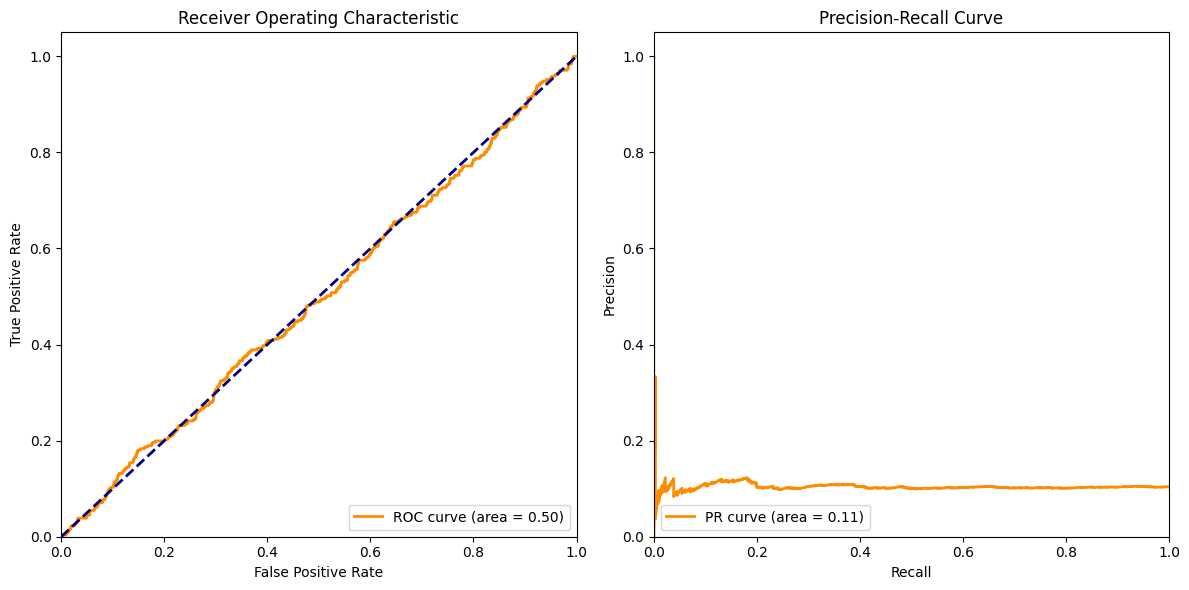

In [16]:
# Plot ROC and PR curves
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(Y_train, Zp)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_train, Zp)
pr_auc = average_precision_score(Y_train, Zp)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### Polynomial kernel SVM

In [17]:
# Poly SVM
C_vals = [0.1, 1, 5, 10, 20, 50, 100]
degrees = [2, 3, 4, 5]

param_grid = {
    'C': C_vals,
    'degree': degrees
}

grid_search = GridSearchCV(SVC(kernel='poly', class_weight='balanced', random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, Y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'C': 1, 'degree': 2}
Best score: 0.9249147024113343


### RBF Kernel SVM

In [83]:
from sklearn.metrics import make_scorer

In [149]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_svm = SVC(C=1, gamma='scale', kernel='rbf', probability=True)
best_svm.fit(X_train_scaled, Y_train)

Y_pred_best_svm = best_svm.decision_function(X_test_scaled)
Y_proba_best_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

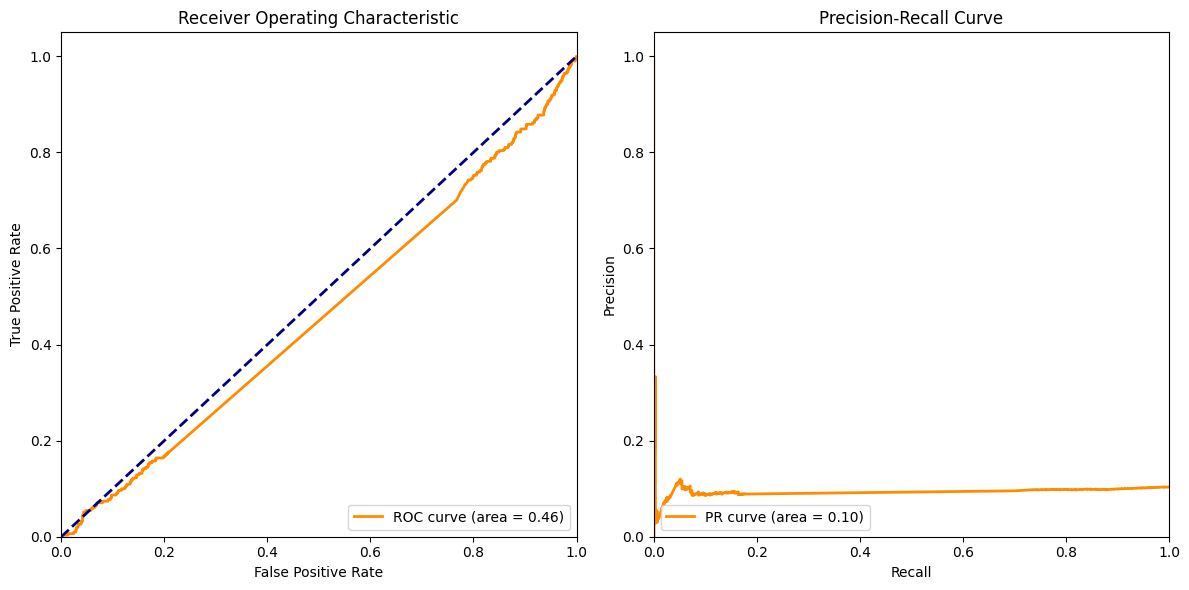

In [150]:
fpr, tpr, thresholds = roc_curve(Y_train, Y_proba_best_svm)
roc_auc = auc(fpr, tpr)

precision, recall, thresholds = precision_recall_curve(Y_train, Y_proba_best_svm)
pr_auc = average_precision_score(Y_train, Y_proba_best_svm)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

### Stratified K-Fold Cross Validation for SVM with Linear, Poly, and RBF kernels and Random Forest Classifier


In [111]:
# Stratified K-Fold Cross Validation for SVM with Linear, Poly, and RBF kernels and Random Forest Classifier

# Define classifiers and their parameter grids
classifiers = {
    'Linear_SVM': {
        'model': SVC(kernel='linear', probability=True),
        'params': {'C': [0.1, 1, 10]}
    },
    'Poly_SVM': {
        'model': SVC(kernel='poly', probability=True),
        'params': {'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}
    },
    'RBF_SVM': {
        'model': SVC(kernel='rbf', probability=True),
        'params': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
    }
}

# Define scoring metrics
scoring_metrics = {
    'Accuracy': 'accuracy',
    'Balanced_Accuracy': make_scorer(balanced_accuracy_score),
    'AUC_ROC': 'roc_auc',
    'AUC_PR': 'average_precision'
}

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a DataFrame to store summary results
summary_rows = []

# Perform grid search for each classifier
for name, clf_info in classifiers.items():
    grid_search = GridSearchCV(clf_info['model'], clf_info['params'], cv=cv, scoring=scoring_metrics, refit='AUC_ROC', n_jobs=-1)
    grid_search.fit(X_train, Y_train)

    # Store the best parameters and the corresponding scores
    best_index = grid_search.best_index_
    summary_rows.append({
        'Classifier': name,
        'Best_Params': grid_search.best_params_,
        'Mean_Accuracy': grid_search.cv_results_['mean_test_Accuracy'][best_index],
        'Std_Accuracy': grid_search.cv_results_['std_test_Accuracy'][best_index],
        'Mean_Balanced_Accuracy': grid_search.cv_results_['mean_test_Balanced_Accuracy'][best_index],
        'Std_Balanced_Accuracy': grid_search.cv_results_['std_test_Balanced_Accuracy'][best_index],
        'Mean_AUC_ROC': grid_search.cv_results_['mean_test_AUC_ROC'][best_index],
        'Std_AUC_ROC': grid_search.cv_results_['std_test_AUC_ROC'][best_index],
        'Mean_AUC_PR': grid_search.cv_results_['mean_test_AUC_PR'][best_index],
        'Std_AUC_PR': grid_search.cv_results_['std_test_AUC_PR'][best_index]
    })

    clf_info['best_params'] = grid_search.best_params_

# Display the summary results
summary_df = pd.DataFrame(summary_rows)
print(summary_df)


      Classifier                                        Best_Params  \
0     Linear_SVM                                         {'C': 0.1}   
1       Poly_SVM           {'C': 10, 'degree': 2, 'gamma': 'scale'}   
2        RBF_SVM                        {'C': 10, 'gamma': 'scale'}   
3  Random_Forest  {'max_depth': None, 'min_samples_leaf': 2, 'mi...   

   Mean_Accuracy  Std_Accuracy  Mean_Balanced_Accuracy  Std_Balanced_Accuracy  \
0       0.884000      0.009226                0.727647               0.046680   
1       0.919667      0.008654                0.706341               0.044126   
2       0.931000      0.010985                0.762505               0.030432   
3       0.925000      0.003333                0.652518               0.012429   

   Mean_AUC_ROC  Std_AUC_ROC  Mean_AUC_PR  Std_AUC_PR  
0      0.877789     0.017968     0.444612    0.081070  
1      0.909045     0.019556     0.614502    0.075674  
2      0.924293     0.021542     0.702443    0.068474  
3      0.94232

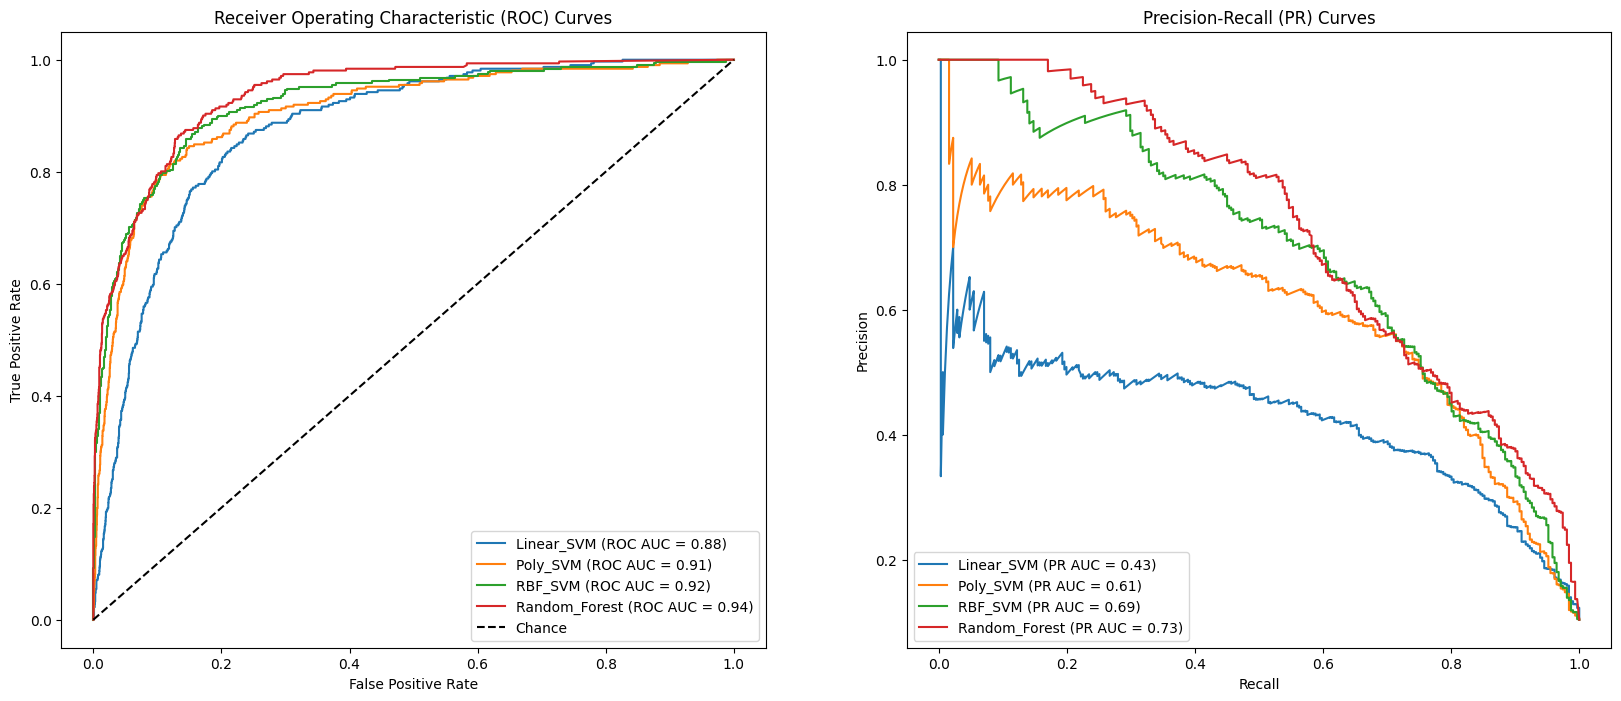

In [115]:
from sklearn.model_selection import cross_val_predict

fig, (ax_roc, ax_pr) = plt.subplots(1, 2, figsize=(20, 8))

for name, clf_info in classifiers.items():
    best_estimator = clf_info['model'].set_params(**clf_info['best_params'])
    y_probas = cross_val_predict(best_estimator, X_train, Y_train, cv=cv, method='predict_proba', n_jobs=-1)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(Y_train, y_probas[:, 1])
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, label=f'{name} (ROC AUC = {roc_auc:.2f})')

    # PR Curve
    precision, recall, _ = precision_recall_curve(Y_train, y_probas[:, 1])
    pr_auc = average_precision_score(Y_train, y_probas[:, 1])
    ax_pr.plot(recall, precision, label=f'{name} (PR AUC = {pr_auc:.2f})')

# ROC subplot
ax_roc.plot([0, 1], [0, 1], 'k--', label='Chance')
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('Receiver Operating Characteristic (ROC) Curves')
ax_roc.legend(loc="lower right")

# PR subplot
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')
ax_pr.set_title('Precision-Recall (PR) Curves')
ax_pr.legend(loc="lower left")

# Show plot
plt.show()


In [118]:
# Overall Results for SVM and Random Forest

std_scaler = StandardScaler()

# SVM grid parameters
svm_grid = {
    'C' : C_vals,
    'kernel' : ['linear', 'poly', 'rbf'],
    'degree' : degrees,
    'gamma' : ['scale', 'auto']
}

# Random Forest grid parameters
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search for SVM and Random Forest
for model, param in zip([SVC(), RandomForestClassifier()], (svm_grid, rf_params)):
    if model.__class__.__name__ == 'SVC':
        param['probability'] = [True]

    grid_search = GridSearchCV(model, param, cv=cv, scoring='roc_auc', n_jobs=-1)

    grid_search.fit(X_train, Y_train)
    grid_search_result = grid_search.cv_results_

    # Calculating performance metrics
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}")

Best parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
Best score: 0.9242927176284337
Best parameters: {'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.940185102967439


**Strategy for selecting the optimal classifier**

- The classifier selection strategy involved an incremental approach, starting with a `simple Linear SVM` to set a baseline and progressing to more complex models, including `Polynomial SVM` and `RBF SVM`, to incorporate non-linearity. 
- The `Random Forest` classifier was also used for evaluation. 
- K-fold cross-validation ensured robust performance assessment, and Grid Search CV was important for hyperparameter optimization. 
- The optimal classifier was chosen based on a balance of accuracy, AUC-ROC, AUC-PR, and balanced accuracy, aiming for a model that performs well across various metrics and generalizes effectively to new data.

**Observations:**
- `The Random Forest classifier outperforms other models on the ROC curve`, which emphasizes a better true positive rate across all threshold as well as on the PR curve, which shos higher precision over most levels of recall.

- The PR curves provides the trade-off between precision and recall among the models, with some maintaining higher precision at the cost of recall.

- There is notable variation in performance across different models and metrics, suggesting the importance of model selection and parameter tuning tailored to the desired balance of evaluation metrics for the task at hand.

### Question 4

In [87]:
from sklearn.decomposition import PCA

### Task 4.1

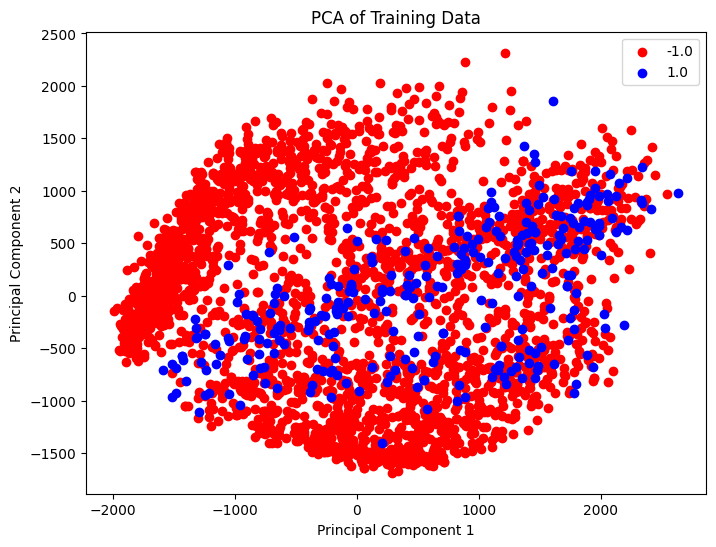

In [88]:
# Task 1 : Reduce the number of dimensions of the training data using PCA to 2 and plot a scatter 
# plot of the training data showing examples of each class in a different colour.

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

comp1 = X_train_pca[:, 0]
comp2 = X_train_pca[:, 1]

plt.figure(figsize=(8, 6))
for label, color in zip(np.unique(Y_train), ['r', 'b']):
    indices = np.where(Y_train == label)
    plt.scatter(comp1[indices], comp2[indices], c=color, label=label)


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Training Data')
plt.legend()
plt.show()

**Observations:**

- There is a significant `overlap between the two classes`. This shows that the data is not linearly separable in the reduced space, this makes it challenging for linear models to achieve high classification accuracy.

- The red and blue points seem to be distributed throughout the same space, without any clear boundary or cluster formation.

- The lack of clustering poses a challenge for clustering algorithms or models that rely on the assumption that different classes form distinct groups.

These observations suggest that classification models may require more complex decision boundaries than what is being provided by the first two principal components.

### Task 4.2

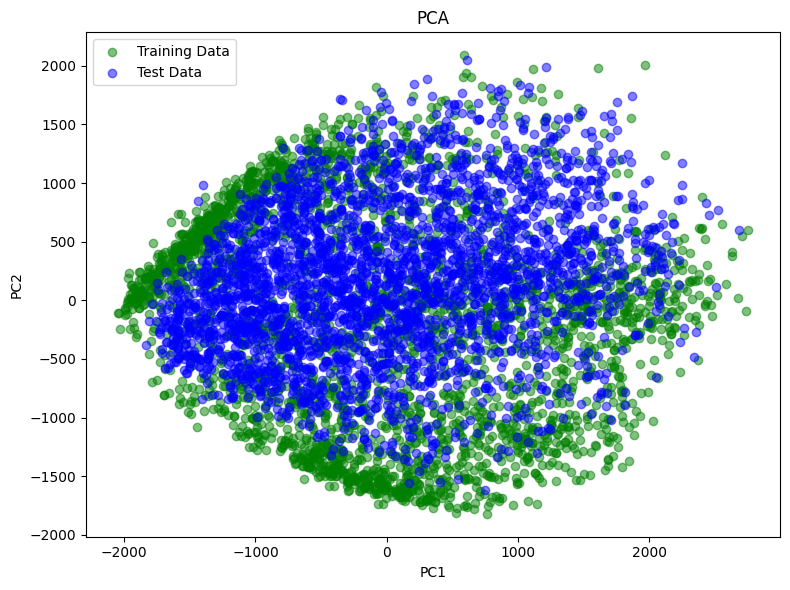

In [93]:
# Task 2 : Reduce the number of dimensions of the training and test data together using PCA to 2 
# and plot a scatter plot of the training and test data showing examples of each set in a different colour (or marker style).

plt.figure(figsize=(8, 6))

X_pca = pca.fit_transform(np.vstack((X_train, X_test)))
X_test_pca = X_pca[training_examples:]

# Plot PCA for training and test data
plt.scatter(X_pca[:training_examples, 0], X_pca[:training_examples, 1], label="Training Data", alpha=0.5, color='g')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], label="Test Data", alpha=0.5, color='b')
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()

plt.tight_layout()
plt.show()

**Observations:**

- There is a significant `overlap between the training and test data points`. This shows that the transformation using PCA captures and preserves the distribution of the original high-dimensional data.
- Both the training and test sets are `widely spread out over the first two principal components` which shows that the data is quite variable, but there is no clear linear separation between the two sets of classes based on these two components.
- There is `no distinct formation of clusters`, which tells that simple linear models will not perform well.
- The similar shape and spread of points in the scatter plot for both training and test sets shows that the PCA components have `captured the variance of the data similarly for both sets`. 
- This tells us that for model generalization the test set is not fundamentally different in its structure compared to the training set.

### Task 4.3

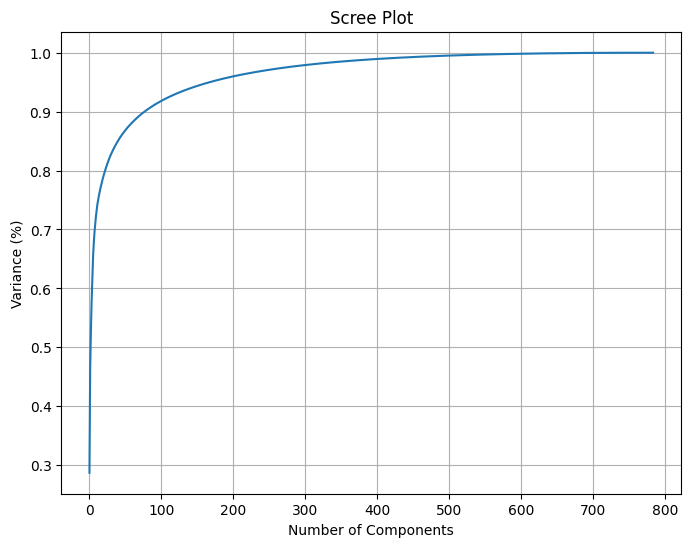

In [98]:
# Task 3: Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set

pca_full_X = PCA().fit(X_train)

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full_X.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [99]:
# Number of components to retain 95% variance
n_components_95 = np.where(np.cumsum(pca_full_X.explained_variance_ratio_) > 0.95)[0][0] + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

Number of components to retain 95% variance: 168


### Task 4.4

In [100]:
from sklearn.pipeline import Pipeline

In [102]:
# Task 4: Reduce the number of dimensions of the data using PCA and perform classification

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC(kernel='rbf', probability=True))
])

param_grid = {
    'pca__n_components': [2, 5, 10, 20, 50, 100, 168],
    'classifier__C': C_vals,
    'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]
}

In [103]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, Y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'classifier__C': 20, 'classifier__gamma': 'scale', 'pca__n_components': 50}
Best score: 0.9278912161136829


In [158]:
from sklearn.model_selection import cross_val_score

print("Cross Validation Scores : ")
cross_val_acc = cross_val_score(grid_search.best_estimator_, pca_full_X.transform(X_train)[:, :50], Y_train)
print(f"Cross Val Score : {cross_val_acc}")


print(f"Cross Validation Mean Accuracy: {cross_val_acc.mean():.4f}")
print(f"Cross Validation Standard Deviation: {cross_val_acc.std():.4f}")

Cross Validation Scores : 
Cross Val Score : [0.91666667 0.92333333 0.92       0.92       0.915     ]
Cross Validation Mean Accuracy: 0.9190
Cross Validation Standard Deviation: 0.0029


### Question 5

In [106]:
from sklearn.pipeline import Pipeline

In [129]:
# SVM
svm_pipeline_params = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC(probability=True, kernel='rbf'))
]

svm_param_grid_classifier = [
    {
        'pca__n_components' : [2, 10, 20, 50, 100, 168],
        'classifier': [SVC(probability=True)],
        'classifier__C': C_vals,
        'classifier__gamma': ['scale', 'auto', 0.1, 1, 10]
    }
]

# Random Forest
rf_pipeline_params = [
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier())
]

rf_param_grid_classifier = [
    {
        'pca__n_components' : [2, 10, 20, 50, 100, 168],
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [10, 50, 100, 150, 200],
        'classifier__max_depth': [5, 10, 20, 50, 100],
        'classifier__min_samples_split': [2, 5, 10, 20, 50],
        'classifier__min_samples_leaf' : [1, 2, 4, 8, 16]
    }
]

In [133]:
svm_pipeline = Pipeline(svm_pipeline_params)
svm_grid_search_pipeline = GridSearchCV(svm_pipeline, svm_param_grid_classifier, cv=cv, scoring='roc_auc', n_jobs=-1)
svm_grid_search_pipeline.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=-1,
             param_grid=[{'classifier': [SVC(probability=True)],
                          'classifier__C': [0.1, 1, 5, 10, 20, 50, 100],
                          'classifier__gamma': ['scale', 'auto', 0.1, 1, 10],
                          'pca__n_components': [2, 10, 20, 50, 100, 168]}],
             scoring='roc_auc')

In [139]:
# Output the best parameters and the corresponding score
print("SVM Best Parameters: ")
print("Best Parameters:", svm_grid_search_pipeline.best_params_)
print("Best ROC AUC Score:", svm_grid_search_pipeline.best_score_)

cv_results = svm_grid_search_pipeline.cv_results_
best_index = svm_grid_search_pipeline.best_index_

mean_accuracy = cv_results['mean_test_score'][best_index]
std_accuracy = cv_results['std_test_score'][best_index]

print(f"Cross Validation Mean Accuracy: {mean_accuracy:.4f}")
print(f"Cross Validation Standard Deviation of Accuracy: {std_accuracy:.4f}")


SVM Best Parameters: 
Best Parameters: {'classifier': SVC(probability=True), 'classifier__C': 10, 'classifier__gamma': 'scale', 'pca__n_components': 100}
Best ROC AUC Score: 0.928740953447036
Cross Validation Mean Accuracy: 0.9287
Cross Validation Standard Deviation of Accuracy: 0.0215


In [135]:
rf_pipeline = Pipeline(rf_pipeline_params)
rf_grid_search_pipeline = GridSearchCV(rf_pipeline, rf_param_grid_classifier, cv=cv, scoring='roc_auc', n_jobs=-1)
rf_grid_search_pipeline.fit(X_train, Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [5, 10, 20, 50, 100],
                          'classifier__min_samples_leaf': [1, 2, 4, 8, 16],
                          'classifier__min_samples_split': [2, 5, 10, 20, 50],
                          'classifier__n_estimators': [10, 50, 100, 150, 200],
                          'pca__n_components': [2, 10, 20, 50, 100, 168]}],
             scoring='roc_auc')

In [140]:
# Output the best parameters and the corresponding score

print("Random Forest Best Parameters and Scores: ")
print("Best Parameters:", rf_grid_search_pipeline.best_params_)
print("Best ROC AUC Score:", rf_grid_search_pipeline.best_score_)

cv_results = rf_grid_search_pipeline.cv_results_
best_index = rf_grid_search_pipeline.best_index_

mean_accuracy = cv_results['mean_test_score'][best_index]
std_accuracy = cv_results['std_test_score'][best_index]

print(f"Cross Validation Mean Accuracy: {mean_accuracy:.4f}")
print(f"Cross Validation Standard Deviation of Accuracy: {std_accuracy:.4f}")

Random Forest Best Parameters and Scores: 
Best Parameters: {'classifier': RandomForestClassifier(), 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 150, 'pca__n_components': 50}
Best ROC AUC Score: 0.9320323219494242
Cross Validation Mean Accuracy: 0.9320
Cross Validation Standard Deviation of Accuracy: 0.0117


In [145]:
best_model = svm_grid_search_pipeline.best_estimator_

scores = best_model.predict_proba(X_test)[:, 1]
scores = np.reshape(scores, (-1, 1))

# Save the scores to a CSV file
pred_df = pd.DataFrame(scores, columns=['Score'])
pred_df.to_csv('prediction_scores.csv', index=False, header=False)

In [142]:
best_model = rf_grid_search_pipeline.best_estimator_

scores = best_model.predict_proba(X_test)[:, 1]

# Save the scores to a CSV file
pred_df = pd.DataFrame(scores, columns=['Score'])
pred_df.to_csv('rf_prediction_scores.csv', index=False, header=False)

**Observations:**

- Both SVM and Random Forest classifiers were optimized through pipelines utilising `StandardScaler` for normalizing the data, `PCA` for dimensionality reduction, and hyperparameter tuning via `GridSearchCV`. This approach ensured that each classifier was evaluated under optimal conditions for maximizing the ROC AUC score.

- The best parameters for the SVM involved a `C` value of 10, `gamma` set to 'scale', and PCA components set to 100. 
- For the Random Forest classifier, optimal settings included a `max_depth` of 10, `min_samples_leaf` of 4, `min_samples_split` of 10, `n_estimators` of 150, and PCA components set to 50.

- The SVM classifier achieved a best ROC AUC score of 0.9287, while the Random Forest classifier slightly outperformed SVM with a best ROC AUC score of 0.9320. This indicates a close performance between the two models in terms of their ability to discriminate between classes.

- The standard deviation of the cross-validation scores was relatively low for both models (0.0215 for SVM and 0.0117 for Random Forest), suggesting that both classifiers are stable across different subsets of the data and less likely to overfit.

- The analysis suggests that both SVM and Random Forest classifiers, offer robust performance with subtle differences in their effectiveness.

### Q6. Another classification problem

#### i. Using the data given to you, consider an alternate classification problem in which the label of an example is based on whether it is a part of the training set (label = -1) or the test set (label = +1). Calculate the average and standard deviation of AUC-ROC using 5-fold stratified cross-validation for a classifier that is trained  to solve this prediction task. 

In [57]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_new = np.vstack((X_train, X_test))
Y_new = np.array([-1]*len(X_train) + [1]*len(X_test))

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
classifier = RandomForestClassifier(random_state=42)

# Perform stratified cross-validation and calculate AUC-ROC
auc_roc_scores = cross_val_score(classifier, X_new, Y_new, scoring='roc_auc', cv=skf)

mean_auc_roc = np.mean(auc_roc_scores)
std_auc_roc = np.std(auc_roc_scores)

print(f"Average AUC-ROC: {mean_auc_roc:.4f}")
print(f"Standard Deviation of AUC-ROC: {std_auc_roc:.4f}")

Average AUC-ROC: 0.9997
Standard Deviation of AUC-ROC: 0.0006


#### ii. What does the value of this AUC-ROC tell you about any differences between training and test sets? Show code for this analysis and clearly explain your conclusions with supporting evidence. How can you use this experiment to identify and eliminate any systematic differences between training and test sets?

**Observations:**

- The high average AUC-ROC value close to 1 (0.9997) with a very low standard deviation (0.0006) suggests that the classifier is extremely good at distinguishing between examples from the training set and the test set.

- It also suggests significant differences in their distributions, which can be possibly due to dissimilar distributions or feature engineering bias. To address these issues, one should:

1. Conduct a thorough feature analysis to identify any features that significantly differ between the two sets.
2. Review the data collection process to ensure consistency and representativeness.
3. Adjust the datasets by rebalancing if needed.
4. Re-evaluate and potentially revise the feature engineering process to eliminate bias.
5. Employ extensive cross-validation techniques to enhance the model's robustness and generalizability.

By addressing these aspects, the systematic differences between training and test sets can be reduced, enhancing the model's ability to generalize to unseen data.